# Table of Contents
1. [Goals](#Goals)
2. [Description of Attributes](#Description)
3. [Preprocessing](#Preprocessing)
4. [EDA](#EDA)
5. [DecisionTreeModel](#DecisionTreeModel)
6. [DecisionTreeGraph](#DecisionTreeGraph)
7. [OtherModels](#OtherModels)
# Goals

Project for education purposes.Especially not include more advanced preprocessing techniques(like standarization, remove outliers, reducing dimensions etc).

To show off generall skill in Data Science and Machine Learning. 

Prediction price of car using machine learning algorithms. In project I used most basics technics of preprocessing(remove NA's and some data data transformation).
Typically price predictions that's regression problem, but I transform price range to 8 equally divided class.
Example class:
- (5077.718, 10153.25]
- 5077.718 - that's minimal value of range
- 10153.25 - maximum value of range 

So now it's multiclass clasification problem.
To predict classes was used Decision Tree Algorithm, due to simple visualization of model.
At the end project was created table consist of evalution other ML algorithms.

DATA SOURCE
https://archive.ics.uci.edu/ml/datasets/automobile


## Description

Description of the data in the table below in respect of name of variables. Short description for non-obvious name.


| Attribute | Attribute Range | Type of variable |Short description | 
| --- | --- | --- | --- |
| symboling | -3, -2, -1, 0, 1, 2, 3.  | discrete | A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. |
| normalized-losses|from 65 to 256 | discrete  |  represents the average loss per car per year. |
| make |alfa-romero, audi, bmw, chevrolet, etc  | discrete  | desc |
| fuel-type | diesel, gas.   | discrete  | desc |
| aspiration | std, turbo | discrete  | desc |
| num-of-doors | four, two | discrete  | desc |
| body-style | hardtop, wagon, sedan, hatchback, convertible.  | discrete  | desc |
| drive-wheels | 4wd, fwd, rwd | discrete | desc |
| engine-location|  front, rear. | discrete | desc |
| wheel-base| from 86.6 to 120.9.|continuous| desc|
| length |141.1 to 208.1. |continuous| desc|
| width | from 60.3 to 72.3.| continuous | desc|
| height | from 47.8 to 59.8| continuous | desc|
| curb-weight| from 1488 to 4066. | continuous | desc|
| engine-type| dohc, dohcv, l, ohc, ohcf, ohcv, rotor | discrete | desc|
| num-of-cylinders | eight, five, four, six, three, twelve, two | discrete | desc|
| engine-size | from 61 to 326 | continuous | desc | 
| fuel-system | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi | discrete | desc |
| bore | from 2.54 to 3.94. | continuous | desc |
| stroke | 2.07 to 4.17. |  continuous | desc |
| compression-ratio | 7 to 23. | continuous | desc |
| horsepower | from 48 to 288 | continuous | desc |
| peak-rpm | from 4150 to 6600. | continuous | desc |
| city-mpg | from 13 to 49.  | continuous | desc | 
| highway-mpg | from 16 to 54. | continuous | desc |
| price | from 5118 to 45400.  | continuous | desc |

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pylab as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("dataset.csv") # read a data

In [3]:
data_types = df.dtypes #check datatypes

In [4]:
data_types

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df["price"] = df["price"].apply(lambda x: x.replace("?", "0")) # replace "?" with "0"
df["horsepower"] = df["horsepower"].apply(lambda x: x.replace("?", "0")) # replace "?" with "0"


In [6]:

df["price"] = df["price"].astype(float) # convert type from object to float64
df["horsepower"] = df["horsepower"].astype(float) # convert type from object to float64

In [7]:
df = df[df["price"]>0] # get only positive values of price 
df = df[df["horsepower"]>0] # get only positive values of horsepower

In [8]:
#CREATE PRICE INTERVALS FOR CLASSIFICATION
count_intervals = 8
Z = pd.cut(df.price,count_intervals)
Z

0       (10153.25, 15188.5]
1       (15188.5, 20223.75]
2       (15188.5, 20223.75]
3       (10153.25, 15188.5]
4       (15188.5, 20223.75]
5       (15188.5, 20223.75]
6       (15188.5, 20223.75]
7       (15188.5, 20223.75]
8       (20223.75, 25259.0]
10      (15188.5, 20223.75]
11      (15188.5, 20223.75]
12      (20223.75, 25259.0]
13      (20223.75, 25259.0]
14      (20223.75, 25259.0]
15      (30294.25, 35329.5]
16      (40364.75, 45400.0]
17      (35329.5, 40364.75]
18     (5077.718, 10153.25]
19     (5077.718, 10153.25]
20     (5077.718, 10153.25]
21     (5077.718, 10153.25]
22     (5077.718, 10153.25]
23     (5077.718, 10153.25]
24     (5077.718, 10153.25]
25     (5077.718, 10153.25]
26     (5077.718, 10153.25]
27     (5077.718, 10153.25]
28     (5077.718, 10153.25]
29      (10153.25, 15188.5]
30     (5077.718, 10153.25]
               ...         
175    (5077.718, 10153.25]
176     (10153.25, 15188.5]
177     (10153.25, 15188.5]
178     (15188.5, 20223.75]
179     (15188.5, 20

In [9]:
#SHOW INTERVALS
Z.dtypes;


In [10]:
#Prepare intervals to classification

CATS = Z.dtypes.categories
LABELS = [str((x.left, x.right)) for x in CATS]
Y = pd.cut(df.price, count_intervals, labels=LABELS)


In [11]:
#GET ONLY NUMERIC COLUMNS
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df.select_dtypes(include=numerics).columns
X = df[numerical_columns]


In [12]:
#SHOW FIRST 10 ROWS
X.head(10)


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,18,22,17450.0
5,2,99.8,177.3,66.3,53.1,2507,136,8.5,110.0,19,25,15250.0
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,110.0,19,25,17710.0
7,1,105.8,192.7,71.4,55.7,2954,136,8.5,110.0,19,25,18920.0
8,1,105.8,192.7,71.4,55.9,3086,131,8.3,140.0,17,20,23875.0
10,2,101.2,176.8,64.8,54.3,2395,108,8.8,101.0,23,29,16430.0


## EDA

In [13]:
X.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'horsepower', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [14]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,199.0,0.839196,1.257009,-2.0,0.00,1.0,2.00,3.0
wheel-base,199.0,98.824121,6.090838,86.6,94.50,97.0,102.40,120.9
length,199.0,174.151256,12.371905,141.1,166.55,173.2,183.50,208.1
width,199.0,65.882412,2.110996,60.3,64.10,65.5,66.70,72.0
height,199.0,53.775879,2.447039,47.8,52.00,54.1,55.55,59.8
curb-weight,199.0,2556.030151,519.855544,1488.0,2157.00,2414.0,2930.50,4066.0
engine-size,199.0,126.824121,41.752932,61.0,97.50,119.0,143.00,326.0
compression-ratio,199.0,10.178995,4.022424,7.0,8.55,9.0,9.40,23.0
horsepower,199.0,103.396985,37.553843,48.0,70.00,95.0,116.00,262.0
city-mpg,199.0,25.201005,6.451826,13.0,19.00,24.0,30.00,49.0


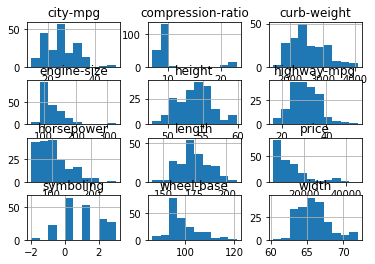

In [15]:
X.hist(bins=10);

## DecisionTreeModel

In [16]:
#First classifier 

from sklearn import tree

In [17]:
my_class = tree.DecisionTreeClassifier()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, np.array(Y), test_size=0.5)

In [20]:
my_class.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
predictions = my_class.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score




In [23]:
Evaluation_table = pd.DataFrame({'Name': ["Decision Tree"],
                                 'accuracy_score': [accuracy_score(Y_test, predictions)],
                                 'precision_score': [precision_score(Y_test, predictions, average="micro")],
                                 'recall_score': [recall_score(Y_test, predictions, average="micro")]})

## DecisionTreeGraph

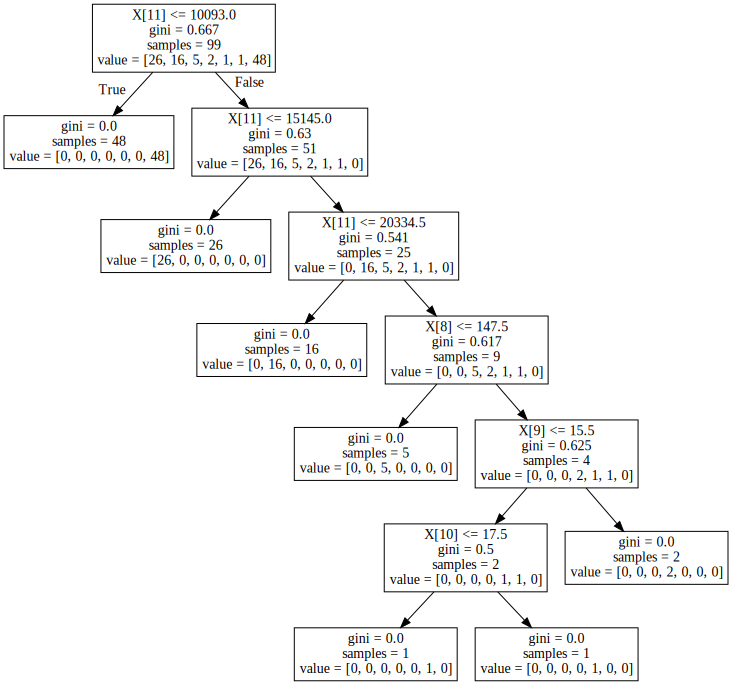

In [24]:
import graphviz
data = tree.export_graphviz(my_class, out_file=None)
graph = graphviz.Source(data)
graph

## OtherModels

In [25]:
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
   

    
    ]

In [27]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted, average="micro")


    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall
3,GradientBoostingClassifier,1.0000,0.91,0.91,0.91
1,BaggingClassifier,1.0000,0.90,0.90,0.90
13,KNeighborsClassifier,0.9798,0.89,0.89,0.89
4,RandomForestClassifier,0.9798,0.81,0.81,0.81
6,LogisticRegressionCV,0.8687,0.76,0.76,0.76
12,GaussianNB,0.9091,0.75,0.75,0.75
2,ExtraTreesClassifier,1.0000,0.73,0.73,0.73
8,RidgeClassifierCV,0.7879,0.66,0.66,0.66
0,AdaBoostClassifier,0.7677,0.65,0.65,0.65
7,PassiveAggressiveClassifier,0.5960,0.53,0.53,0.53
